In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

from sklearn import ensemble
import xgboost as xgb
#import lightgbm as lgbm
#import catboost

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier



In [2]:
train = pd.read_csv("../input/data.csv", index_col=0)
test  = pd.read_csv("../input/test_data.csv", index_col=0)

In [3]:
train.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
0,1.000000,60.000001,4.120000e-05,1.000030,60.001129,0.042899,1.030972,61.141578,42.076758,2.518124,...,-6.750000e-31,-1.050000e-18,6.912605,60.0,6.740000e-07,84.852814,6.430000e-13,9.530000e-30,2.100000e-17,0
1,167.710140,74.056343,1.367947e+00,275.682423,74.055832,2.035287,800.992734,74.168634,86.293096,5809.263732,...,0.000000e+00,0.000000e+00,1.000000,74.0,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,1
2,20.597285,60.000000,4.766421e-07,36.598016,60.000016,0.000236,169.084196,60.003085,0.046265,2212.267786,...,0.000000e+00,0.000000e+00,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,2
3,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1
4,110.510428,489.474488,2.771206e+04,195.312252,449.338797,40748.661868,622.525838,404.652507,51472.393782,6410.273050,...,0.000000e+00,0.000000e+00,1.000000,554.0,0.000000e+00,554.000000,0.000000e+00,0.000000e+00,0.000000e+00,2


In [4]:
X = train.drop("target", axis=1)
y = train.target

scaler_full = StandardScaler()
X_scaled = scaler_full.fit_transform(X)

pca_full = PCA(n_components=3)
X_pca = pca_full.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=[f"pca_{i+1}" for i in range(X_pca.shape[1])])

In [5]:
pca_full.explained_variance_ratio_

array([0.36013255, 0.11107562, 0.100361  ])

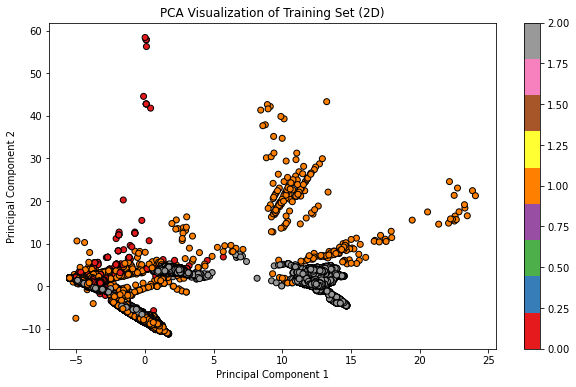

In [6]:
# Visualize the dataset in 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.title('PCA Visualization of Training Set (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

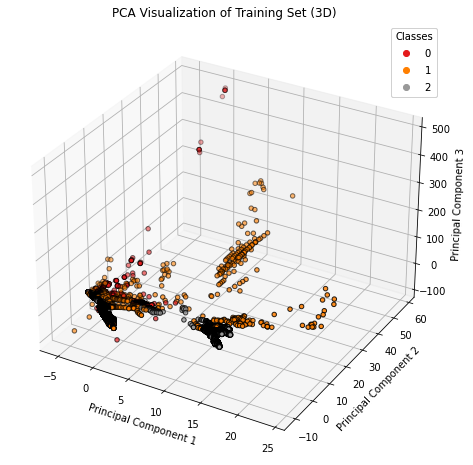

In [7]:
# Visualize the dataset in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], X_pca.iloc[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k')
ax.set_title('PCA Visualization of Training Set (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
plt.show()

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=2024, stratify=y)

In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
test_scaled    = scaler.transform(test)

In [10]:
pca = PCA(n_components=0.99)

X_train_pca = pca.fit_transform(X_train_scaled)
X_train_pca = pd.DataFrame(X_train_pca, columns=[f"pca_{i+1}" for i in range(X_train_pca.shape[1])])

X_val_pca   = pca.transform(X_val_scaled)
X_val_pca   = pd.DataFrame(X_val_pca, columns=[f"pca_{i+1}" for i in range(X_val_pca.shape[1])])

test_pca    = pca.transform(test_scaled)
test_pca    = pd.DataFrame(test_pca, columns=[f"pca_{i+1}" for i in range(test_pca.shape[1])])


In [11]:
np.sum(pca.explained_variance_ratio_)

0.9904516839662448

In [12]:
X_train_pca.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,...,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29
0,2.456580,3.760502,-2.037390,3.574553,5.759604,0.257898,-0.642915,0.678895,-0.789309,-0.700061,...,0.017256,0.018454,-0.003739,-0.033461,-0.036242,-0.009262,-0.014267,0.017597,-0.118744,0.009720
1,-1.023429,-6.145231,0.857807,0.114042,0.278030,0.018215,-0.681521,0.151396,-0.046887,-0.183305,...,0.010124,0.024344,-0.005533,-0.021720,-0.066294,-0.065186,-0.025662,0.001367,-0.014874,-0.000544
2,12.519187,0.318923,-0.090120,-0.483012,-0.962859,-0.258851,2.525448,-0.781365,0.584664,0.502715,...,0.033412,-0.066127,0.033524,0.000247,0.054815,0.102941,-0.015093,0.044167,0.290939,-0.388017
3,2.621865,3.747990,-2.069004,3.666095,5.917380,0.266193,-0.592936,0.681513,-0.786319,-0.697221,...,0.027923,0.015849,-0.008311,-0.042724,-0.041632,-0.011064,-0.026891,0.006797,0.130848,-0.172611
4,-1.428715,-5.703150,0.818058,0.038455,0.139450,0.011711,-0.760189,0.170328,-0.242309,-0.156894,...,-0.009180,0.027103,-0.029688,0.037307,-0.068597,-0.127358,-0.039011,-0.200909,2.527163,-1.342658


In [58]:
X_val_pca.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,...,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29
0,12.203397,0.547745,-0.219475,-0.354842,-0.857170,-0.296537,2.161163,-0.767440,0.425369,0.527673,...,-0.058270,-0.005916,0.062031,0.063391,0.003701,0.120742,-0.003516,0.036569,-0.176905,-0.011758
1,13.499784,0.866489,3.274541,-0.493655,-1.449018,6.236518,3.419103,4.464374,0.429455,-1.667306,...,-1.073775,-0.350214,1.475028,0.956541,-0.271927,1.858704,-0.258045,0.828307,-0.283940,-1.663996
2,-3.495150,-0.494497,-0.380358,1.070160,1.935629,0.083339,-0.825582,0.070550,0.419153,0.234348,...,0.014938,-0.056201,-0.024244,0.078966,-0.081306,-0.001079,-0.015235,0.047134,-0.721230,0.432801
3,12.502164,0.570147,-0.232425,-0.285828,-0.701150,-0.271631,2.339655,-0.754231,0.468362,0.508788,...,-0.034720,-0.002893,0.061127,0.033352,-0.003767,0.123481,-0.004188,0.036089,0.115366,-0.250084
4,-5.477436,1.891098,-0.247646,-0.457107,-0.900003,-0.079763,0.145447,-0.385627,0.868553,0.377563,...,-0.010123,-0.004487,0.006686,-0.005777,0.036900,0.017022,0.010665,-0.001208,0.009536,-0.003983


In [39]:
logistic_regression = LogisticRegression(   #multi_class="multinomial", 
                                            max_iter=10000,
                                            #class_weight="balanced",  # Addressing class imbalance
                                            #solver="saga",  # Supports multinomial loss
                                            random_state=42)

In [40]:
logistic_regression.fit(X_train_pca, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [38]:
preds = logistic_regression.predict(X_val_pca)

accuracy = metrics.accuracy_score(y_val, preds)
f1 = metrics.f1_score(y_val, preds, average='weighted')
print(f"Model={logistic_regression} /n, Accuracy={accuracy}, F1-Score={f1}\n")
print(f"Confusion Matrix:\n {metrics.confusion_matrix(y_val, preds)}")

Model=LogisticRegression(random_state=42) /n, Accuracy=0.9957161445300771, F1-Score=0.9957161252475412

Confusion Matrix:
 [[14798    58     9]
 [   22 67138   340]
 [    4   209 67287]]


In [59]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [60]:
preds = xgb.predict(X_val_pca)

accuracy = metrics.accuracy_score(y_val, preds)
f1 = metrics.f1_score(y_val, preds, average='weighted')
print(f"Model={xgb} /n, Accuracy={accuracy}, F1-Score={f1}\n")
print(f"Confusion Matrix:\n {metrics.confusion_matrix(y_val, preds)}")

Model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...) /n, Accuracy=0.9998798919027124, F1-Score=0.9998798919027124

Confusion Matrix:
 [[14858     7     0]
 [    7 67491     2]
 [    0     2 67498]]


In [61]:
sample = pd.read_csv("../input/sample_.csv", index_col=0)
xgb_predictions = xgb.predict(test_pca)

sample.target = xgb_predictions
print(sample.head())
sample.to_csv(f"../output/xgb_pca_train_test_split.csv")

    target
ID        
0        1
1        0
2        2
3        1
4        2


In [65]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=8)

In [66]:
preds = knn.predict(X_val_pca)

accuracy = metrics.accuracy_score(y_val, preds)
f1 = metrics.f1_score(y_val, preds, average='weighted')
print(f"Model={xgb} /n, Accuracy={accuracy}, F1-Score={f1}\n")
print(f"Confusion Matrix:\n {metrics.confusion_matrix(y_val, preds)}")

KeyboardInterrupt: 